In [1]:
import json
import torch
import numpy as np
import os
from torch.utils.data import Dataset, DataLoader, random_split
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader as PyGDataLoader
import torch.nn as nn
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sys
from torch_geometric.utils import to_dense_batch
import torch.optim as optim
import json

sys.path.append(os.path.abspath(".."))

<table>
<tr>
<td>

<b>L2D Dataset</b>

| Node Type | Features | Keep |
|-----------|----------|------|
| Ego       |lat & lon |       |
|           |speed  (kilometers/hour)   |  ✔ (turn to m/s)    |
|           | heading  |      |
|           |heading error |      |
|           | acceleration x,y|      |
|           | gas, brake, steering, gear, turn signal|      |
|  Vehicle  | lane classification |      |
|           | distance_to_ego (meters)|  ✔     |
|           | speed (meters/second)|  ✔     |
|           | velocity (meters/second) x,y,z|  ✔     |
|  Pedestrian  | distance_to_ego (meters)|   ✔    |
|  Environment  | month|  ✔     |
|           | day_of_week|   ✔    |
|           | time_of_day|  ✔     |
|           | road_type|      |
|           | road_name|      |
|           | max_speed|      |
|           | lanes (num. of lanes)|      |
|           | surface|      |
|           | oneway (T/F)|      |
|           | width (of road)|      |
|           | sidewalk (left/right/none)|      |
|           | bicycle (shared road/ designated)|      |
|           | bridge (yes/no)|      |
|           | tunnel (yes/no)|      |
|           | traffic_controls|      |
|           | traffic_features|      |
|           | landuse|      |
|           | is_narrow (yes/no)|      |
|           | is_unlit (yes/no)|      |

<td style="padding-left: 50px;">

<b>NuPlan Dataset</b>

| Node Type | Features | Keep |
|-----------|----------|------|
| Ego  | position x,y,z   |     |
|   | velocity x,y,z   |   ✔    |
| | speed |✔ (computed)|
|   Vehicle  | position x,y,z|       |
| | velocity x,y,z |✔ |
| | speed |✔ (computed)|
| | distance_to_ego (meters) |✔ (computed)|
|   Pedestrian  | position x,y,z|       |
| | velocity x,y,z |  |
| | distance_to_ego (meters) |✔ (computed)|
|   Object  | position x,y,z|       |
| | distance_to_ego (meters) |✔ (computed)|
|  Environment  | month|   ✔  (from timestamp)  |
|           | day_of_week|   ✔  (from timestamp)  |
|           | time_of_day|   ✔  (from timestamp)  |


</td>
</tr>
</table>


#### 1. Standardizing the Two Datasets

(See table above)

In [2]:
from functions.standardization import process_dataset

process_dataset("../data/graphical/l2d", 
                "../data/processed_graphical/l2d", 
                dataset="l2d", overwrite=True)

process_dataset("../data/graphical/nuplan 2", 
                "../data/processed_graphical/nuplan", 
                dataset="nuplan", overwrite=True)

100%|██████████| 9593/9593 [00:12<00:00, 738.85it/s]


Done l2d. Wrote: 9593, skipped: 0, errors: 0


100%|██████████| 88368/88368 [01:32<00:00, 950.21it/s] 

Done nuplan. Wrote: 88368, skipped: 0, errors: 0


#### 2. Clean and Standardize Tags

- Even out tag name conventions between the two datasets

In [3]:
from functions.standardization import clean_json_tags

clean_json_tags('../data/semantic_tags/nuplan')
clean_json_tags('../data/semantic_tags/l2d')

100%|██████████| 10001/10001 [00:01<00:00, 6022.84it/s]


#### 3. Clean and Filter Nuplan Dataset

- Reduces number of episodes by filtering out episodes with uncertain action or stationary vehicle

In [4]:
from functions.standardization import filter_nuplan_episodes

filter_nuplan_episodes(origin_tag_path='../data/semantic_tags/nuplan',
                       origin_graph_path="../data/processed_graphical/nuplan",
                       tag_path='../data/semantic_tags/nuplan_final',
                       graph_path="../data/processed_graphical/nuplan_final")

100%|██████████| 26842/26842 [00:15<00:00, 1723.90it/s]


#### Some Visualizations

In [5]:
from functions.graphs import combined_graph_viewer

ep_num = 5
with open(f"../data/processed_graphical/nuplan/{ep_num}_graph.json", "r") as f:
    graph_data = json.load(f)
cyto = combined_graph_viewer({'graph':graph_data})
display(cyto)

with open(f"../data/processed_graphical/l2d/{ep_num}_graph.json", "r") as f:
    graph_data = json.load(f)
cyto = combined_graph_viewer({'graph':graph_data})
display(cyto)

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'label': 'd…

CytoscapeWidget(cytoscape_layout={'name': 'cola'}, cytoscape_style=[{'selector': 'node', 'style': {'label': 'd…

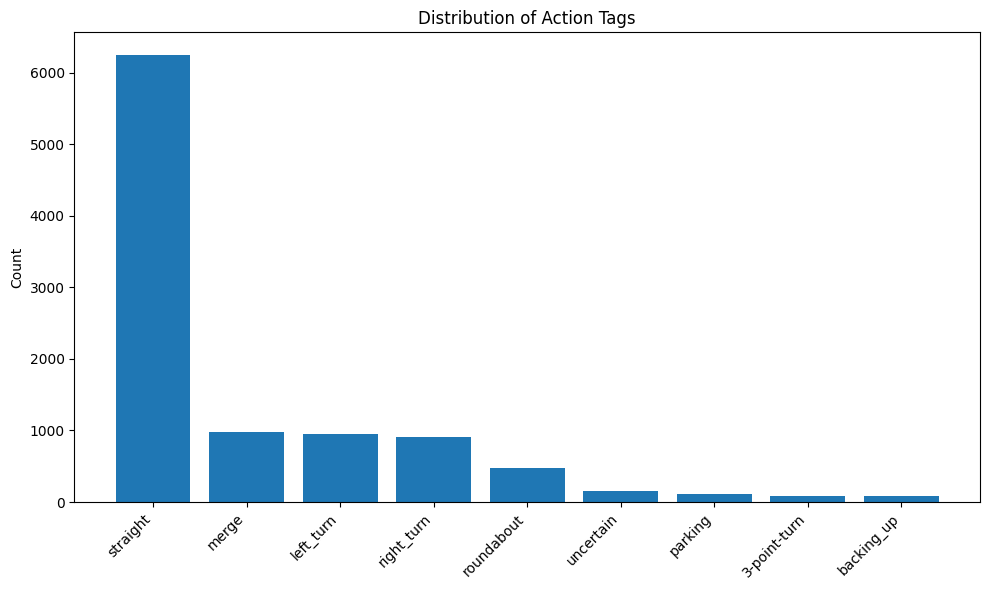

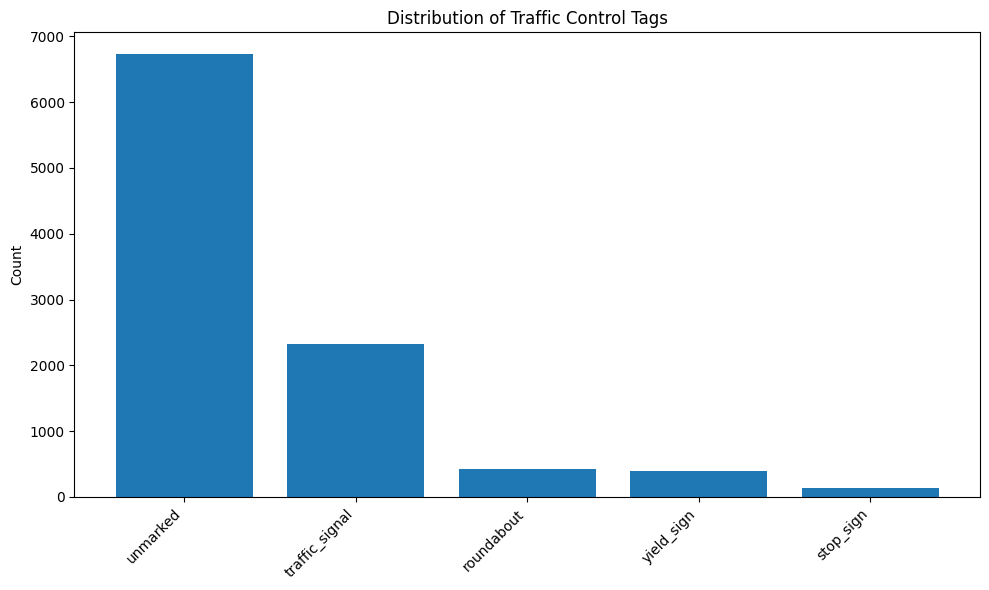

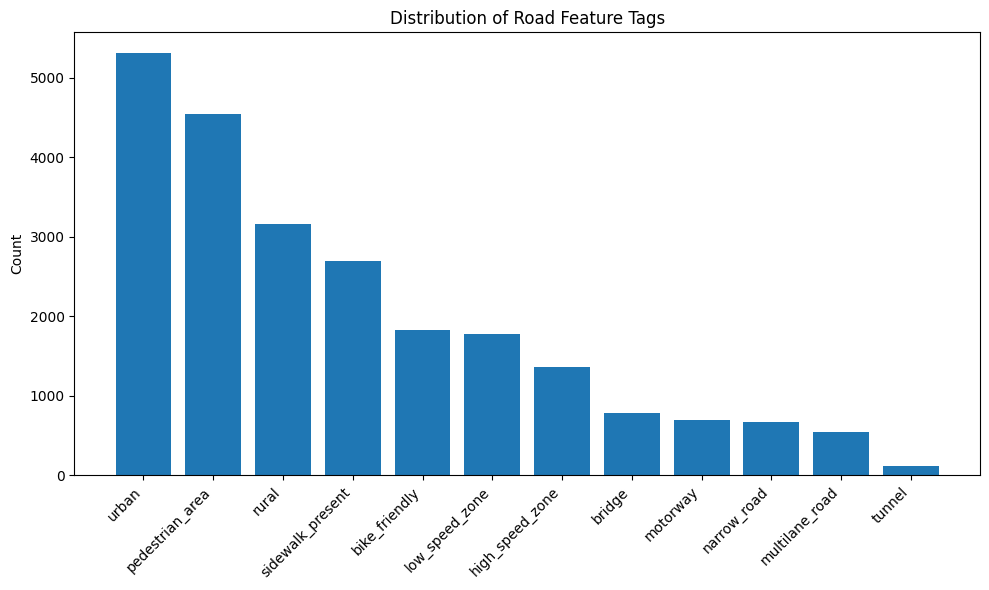

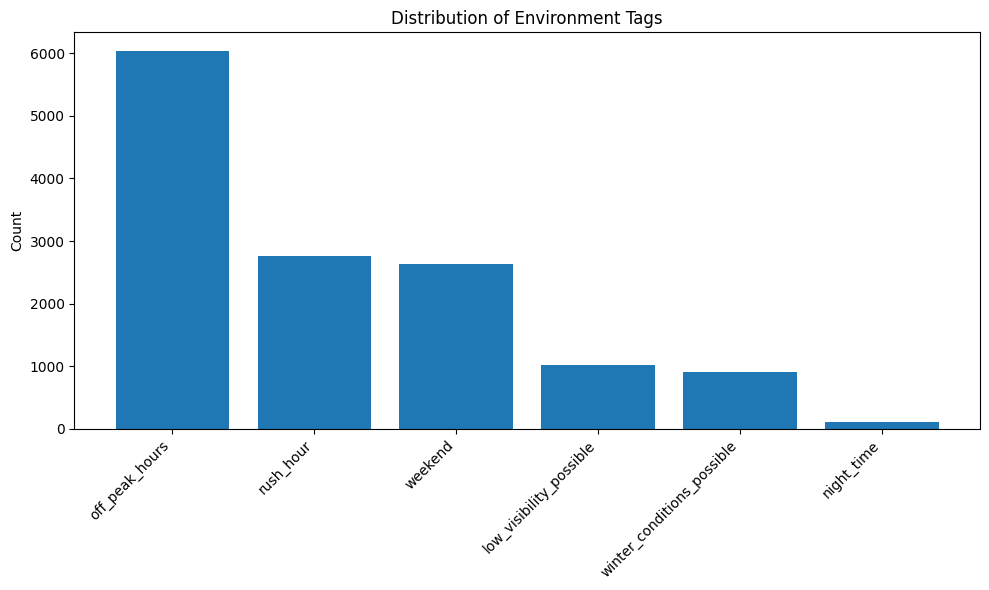

In [ ]:
from functions.data_stats import visualize_tag_distributions
visualize_tag_distributions('../data/semantic_tags/l2d')

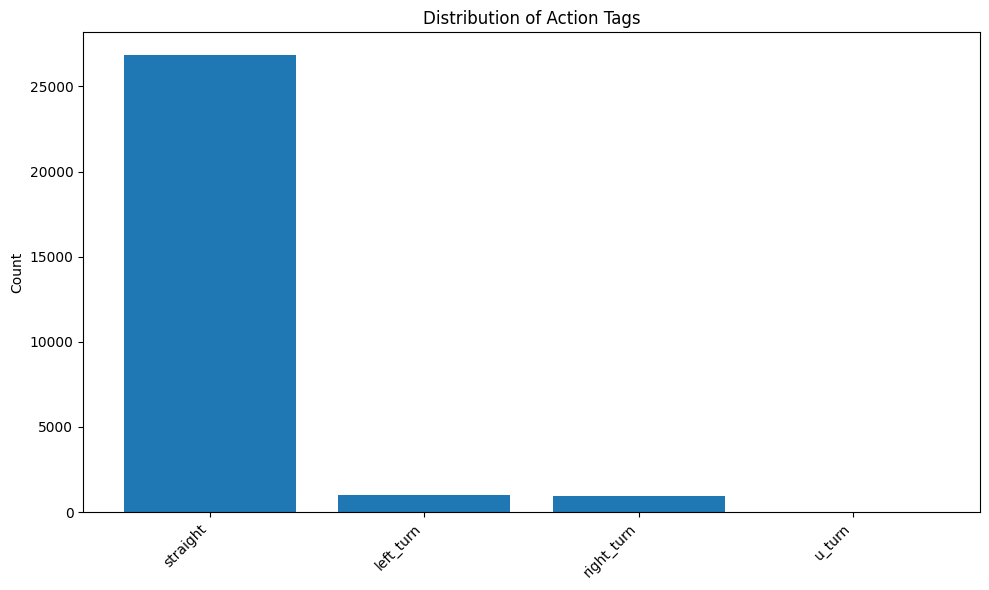

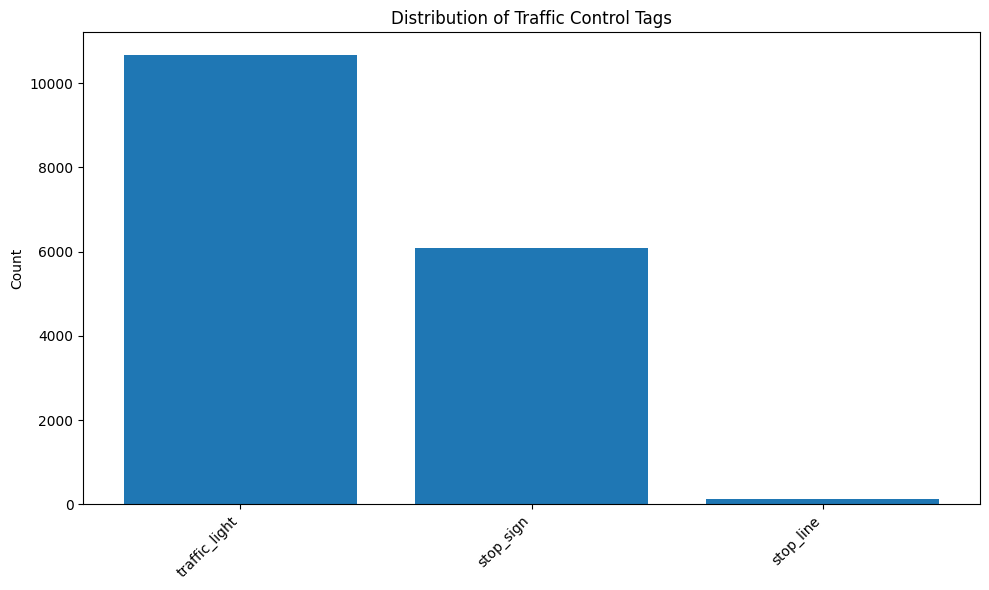

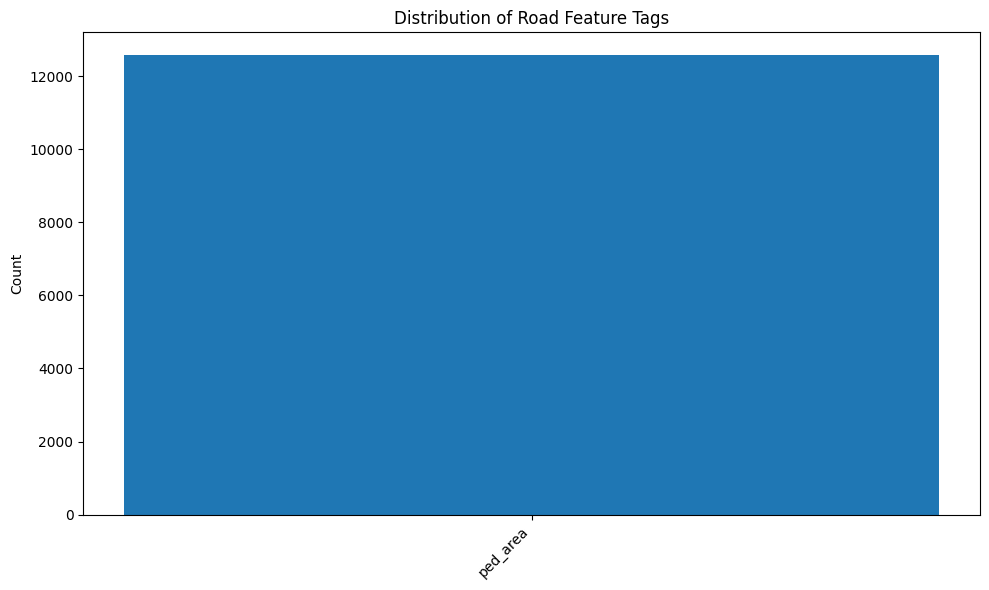

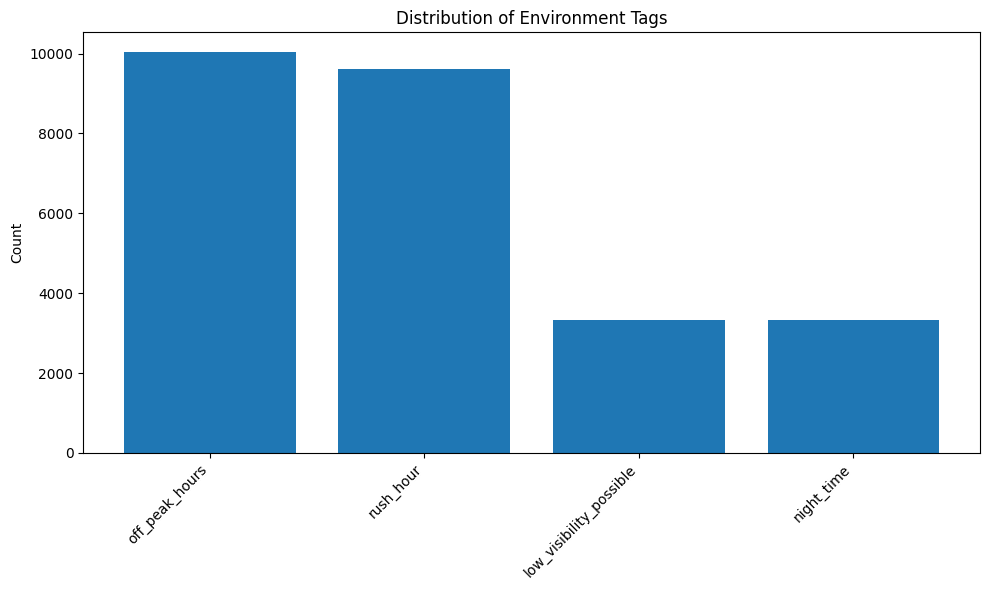

In [8]:
visualize_tag_distributions('../data/semantic_tags/nuplan_final')

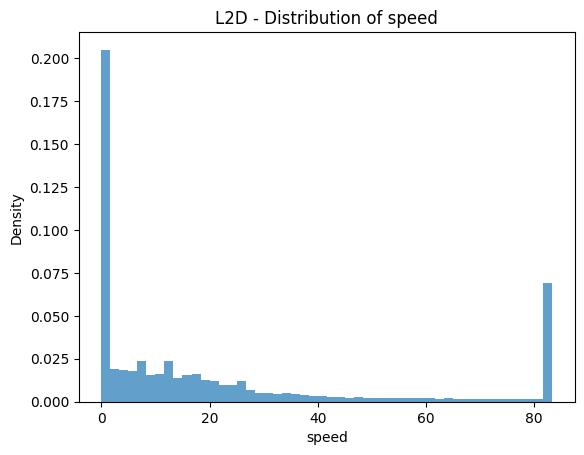

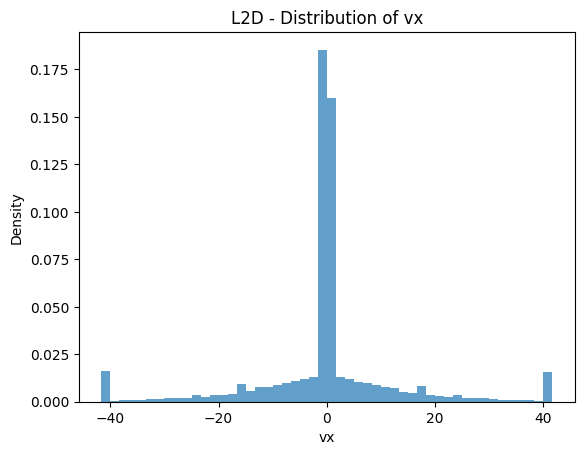

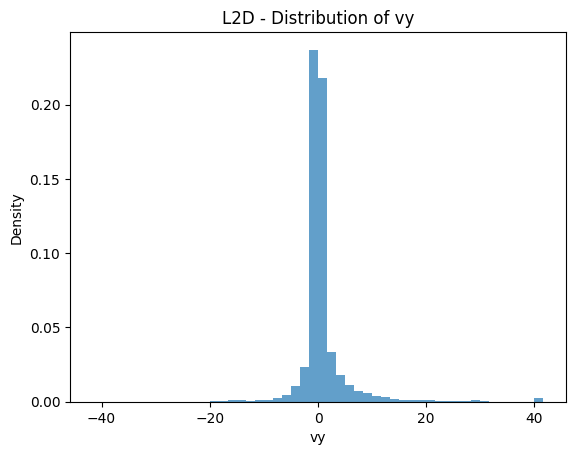

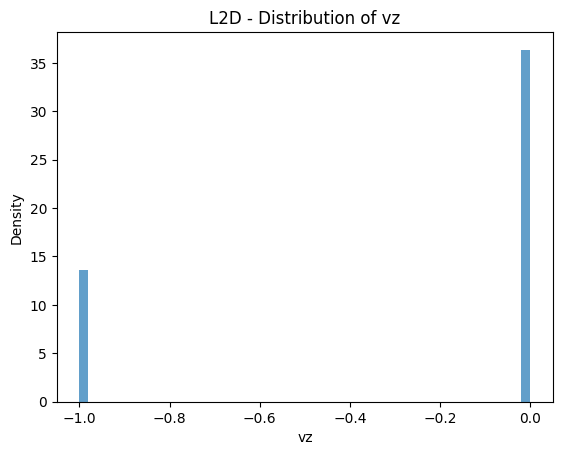

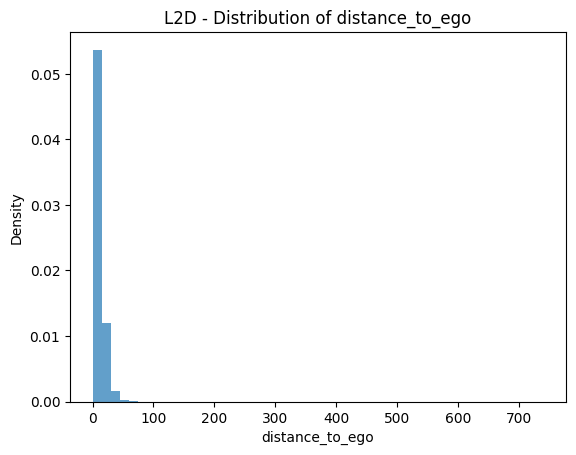

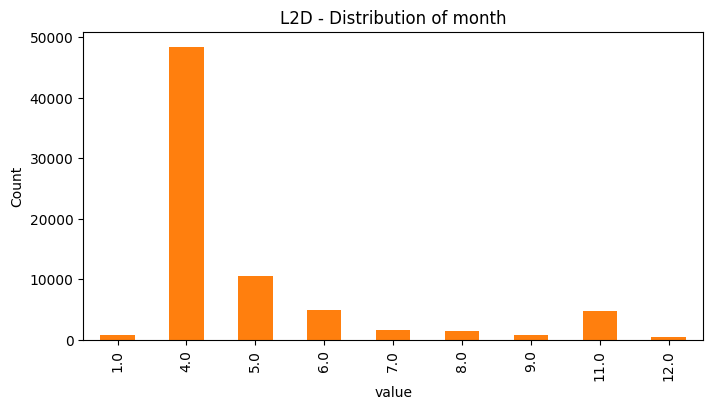

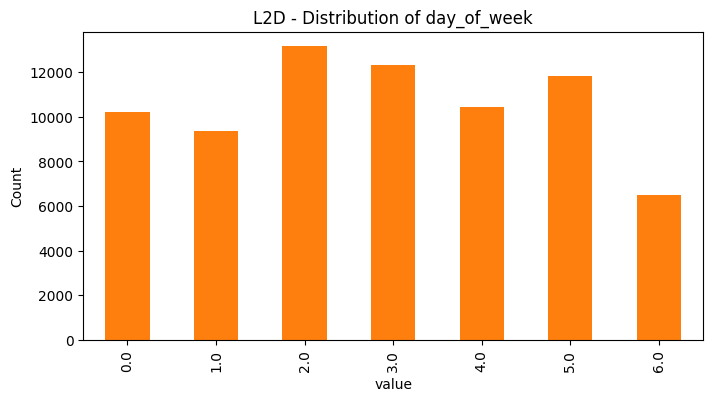

In [9]:
from functions.data_stats import analyze_feature_distributions

analyze_feature_distributions("../data/processed_graphical/l2d", "L2D")

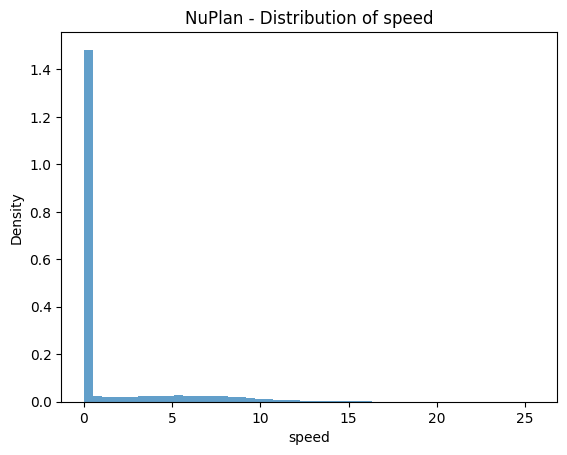

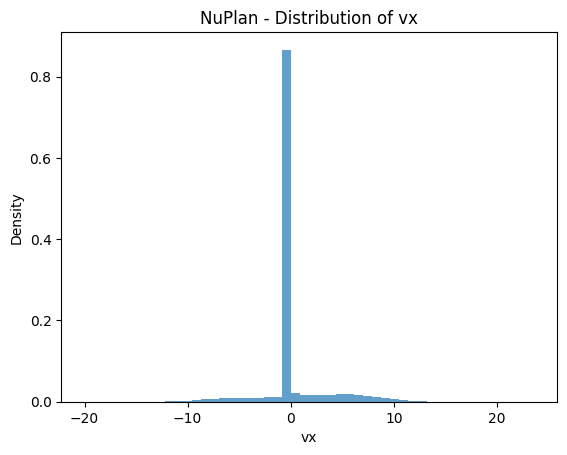

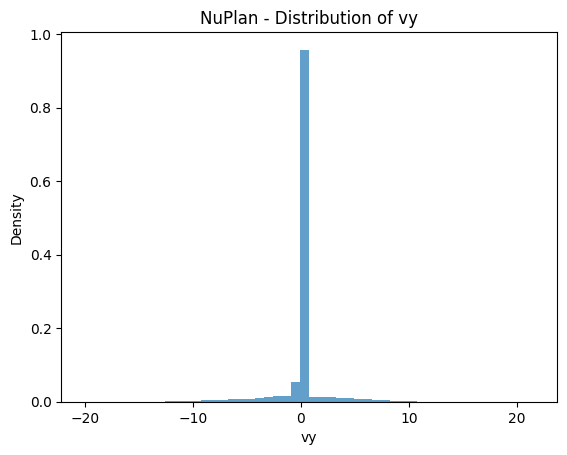

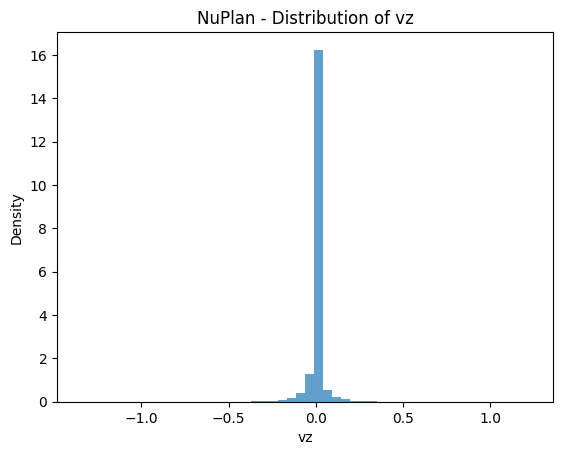

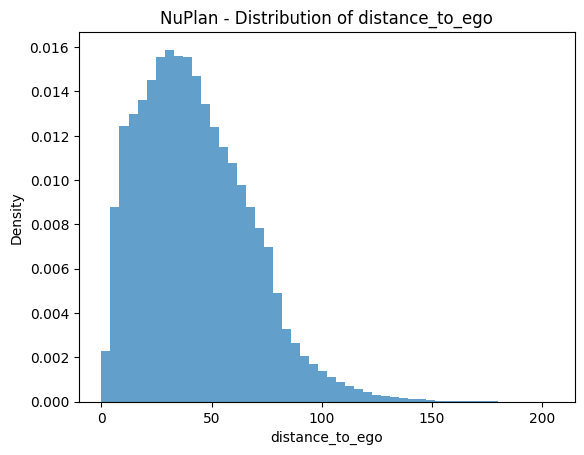

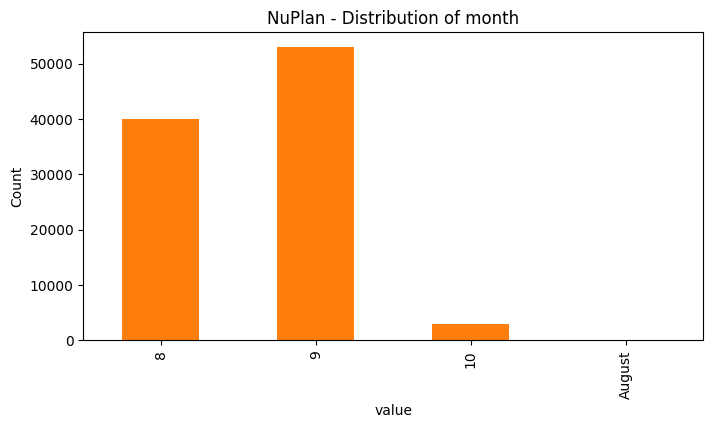

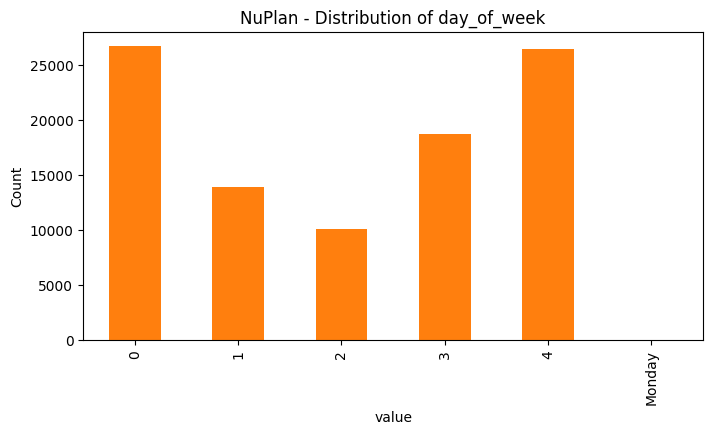

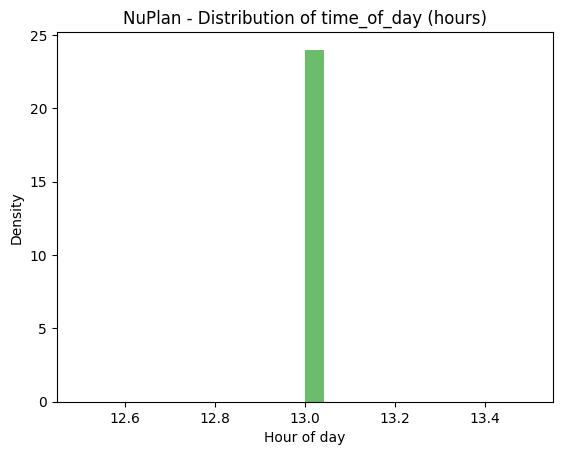

In [10]:
from functions.data_stats import analyze_feature_distributions

analyze_feature_distributions("../data/processed_graphical/nuplan_final", "NuPlan")